In [35]:
# import some necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [36]:
# read the data
df = pd.read_csv("laptops.csv")

In [37]:
# show the first 5 rows of the data
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [38]:
# check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [39]:
#drop the duplicates values
data = df.drop_duplicates()

In [40]:
# check the shape of the data
data.shape

(2160, 12)

In [41]:
# drop the unnecessary columns
data.drop(columns=["GPU"],inplace=True)

In [42]:
data.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [43]:
# check the missing values
percent_of_miss_value =data.isnull().sum() / data.shape[0] * 100
percent_of_miss_value 

Laptop          0.000000
Status          0.000000
Brand           0.000000
Model           0.000000
CPU             0.000000
RAM             0.000000
Storage         0.000000
Storage type    1.944444
Screen          0.185185
Touch           0.000000
Final Price     0.000000
dtype: float64

In [44]:
#counts the number of storages that are in the data
Storage_type = data["Storage type"].value_counts()

In [45]:
#show the number of storages

px.bar(Storage_type, x=Storage_type.index, y=Storage_type.values, color=Storage_type.index, title="Number of Storage Types", labels={"x": "Storage Type", "y": "Count"}, color_discrete_sequence=px.colors.qualitative.Plotly)

In [46]:

px.bar(status)

In [47]:
table = pd.crosstab(data["Status"],data["Storage type"],margins=True,normalize=True)

In [48]:
table

Storage type,SSD,eMMC,All
Status,,,
New,0.672805,0.023135,0.69594
Refurbished,0.300755,0.003305,0.30406
All,0.973560,0.026440,1.00000


In [49]:
table = pd.crosstab(data["Status"],data["Storage type"],values=df['RAM'], aggfunc='mean')

In [50]:
table

Storage type,SSD,eMMC
Status,,
New,15.09193,5.632653
Refurbished,17.44427,7.428571


In [51]:
proportion_table = round(table.div(table.sum(axis=1), axis=0)*100)

proportion_table

Storage type,SSD,eMMC
Status,,
New,73.0,27.0
Refurbished,70.0,30.0


In [52]:
#proportion_table.plot(kind="bar")
px.bar(proportion_table, x=proportion_table.index, y=proportion_table.columns, title="Proportion of RAM by Storage Type and Status", labels={'value':'Proportion (%)', 'index':'Status'}, text_auto=True)

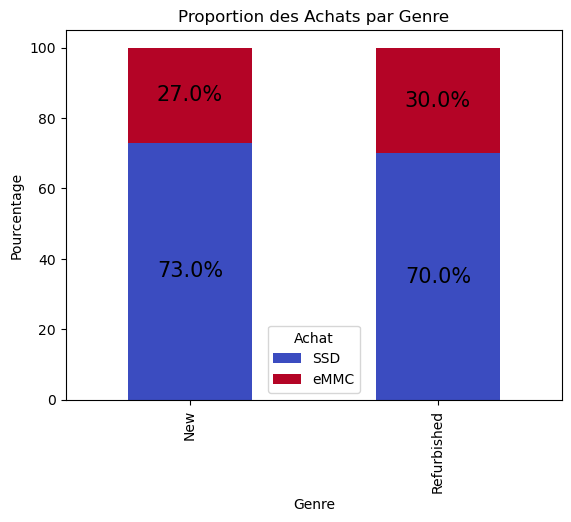

In [53]:
# Tracer le graphique
ax = proportion_table.plot(kind='bar', stacked=True, colormap='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.1f%%", label_type="center", color="black", fontsize=15)
# Ajouter un titre et labels
plt.title("Proportion des Achats par Genre")
plt.xlabel("Genre")
plt.ylabel("Pourcentage")
plt.legend(title="Achat")

# Afficher le graphique
plt.show()


In [54]:
cpu = data["CPU"].value_counts().head()

In [55]:
import plotly.express as px
px.bar(cpu)
#cpu.plot(kind="bar")

In [56]:
mean_price = data.groupby(by=["Brand"])["Final Price"].mean()

In [58]:
px.line(mean_price)#.plot()